# Ressources utilisées
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

https://blog.ytotech.com/2015/11/01/findpeaks-in-python/

In [1]:
import numpy as np
import pandas as pd
import os
from numpy import savetxt #to save numpy array to a file
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Définition de constantes
frequence_hz = 50 # Fréquence en Hz
frequence_sec = 1/frequence_hz

In [3]:
def read_data(data_path, file_name):
    file_path = os.path.join(data_path, file_name)
    data = pd.read_csv(file_path, sep=" ",header=None)
    data.rename(columns={0 : "AccX", 1 : "AccY", 2 : "AccZ", 3 : "GyrX", 4 : "GyrY", 5 : "GyrZ"}, inplace=True)
    data.drop(labels=[6], axis=1, inplace=True)
    return (data)

def read_label(data_path, file_name):
    file_path = os.path.join(data_path, file_name)
    labels = pd.read_csv(file_path, header=None)
    labels.rename(columns={0 : "Walk"}, inplace=True)
    return (labels)

In [4]:
#NOM DU FICHIER DES DONNEES DU SUJET EVENTUELLEMENT A CHANGER 
data_file_name = "1.txt"

data_path = "C:\\Users\\tpailhas\\MIASHS\\TER\\Parkinson\\Dataset\\Gait-Datasets-TIFS20\\Dataset7\\train\\train_data" 
label_path = "C:\\Users\\tpailhas\\MIASHS\\TER\\Parkinson\\Dataset\\Gait-Datasets-TIFS20\\Dataset7\\train\\train_label"
data = read_data(data_path, data_file_name)

label_file_name = os.path.splitext(data_file_name)[0]
label_file_name += "_label.txt"
label = read_label(label_path, label_file_name)

data['Marche'] = label['Walk'] # blue points = walking data / red points = non-walking datas

In [5]:
data.head()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,Marche
0,5.94531,4.35938,7.28516,0.275635,0.072632,0.369629,0
1,5.84766,4.39844,7.22656,0.197144,0.109314,0.319336,0
2,5.94531,4.45703,7.18750,0.277100,0.160034,0.284424,0
3,5.88672,4.43750,7.18750,0.229980,0.148560,0.281982,0
4,5.88672,4.39844,7.14844,0.231445,0.121582,0.246582,0


In [6]:
print(data.describe())
print(data.info())
print(data.columns)

              AccX         AccY         AccZ         GyrX         GyrY  \
count  1024.000000  1024.000000  1024.000000  1024.000000  1024.000000   
mean     -2.477447     0.115170     4.652141     0.852687    -1.424563   
std      10.562619     4.643093     4.423270     5.529164     4.456175   
min     -29.500000   -34.781300    -8.578130   -21.796900   -35.437500   
25%      -9.507810    -1.492193     1.535157    -0.559814    -1.769780   
50%      -7.302735     0.209655     3.765625     0.259521     0.011738   
75%       5.208013     3.062500     7.304690     1.474610     0.437317   
max      39.375000    12.476600    29.484400    27.546900     6.648440   

              GyrZ       Marche  
count  1024.000000  1024.000000  
mean      0.531600     0.418945  
std       2.781228     0.493627  
min      -7.843750     0.000000  
25%      -0.718139     0.000000  
50%       0.283203     0.000000  
75%       1.068602     1.000000  
max      21.781300     1.000000  
<class 'pandas.core.frame.D

# Calcul de l'accélération Acc0

In [7]:
import numpy as np

# ACCo is calculated by ACCo = racine(ACCx2 + ACCy2 + ACCz2) 
# ACCx, ACCy and ACCz denote the values of acceleration in the X, Y, and Z directions

def calc_acc(x):
    AccX , AccY, AccZ = x
    return (np.sqrt(AccX**2 + AccY**2 + AccZ**2)) 

In [8]:
data['Acc'] = data[['AccX','AccY','AccZ']].apply(calc_acc,axis=1)

In [9]:
data['Acc']

0       10.364577
1       10.284190
2       10.337891
3       10.295875
4       10.251826
          ...    
1019     7.882954
1020     8.488748
1021     9.366037
1022    10.644880
1023    11.948159
Name: Acc, Length: 1024, dtype: float64

# Tracés des plots

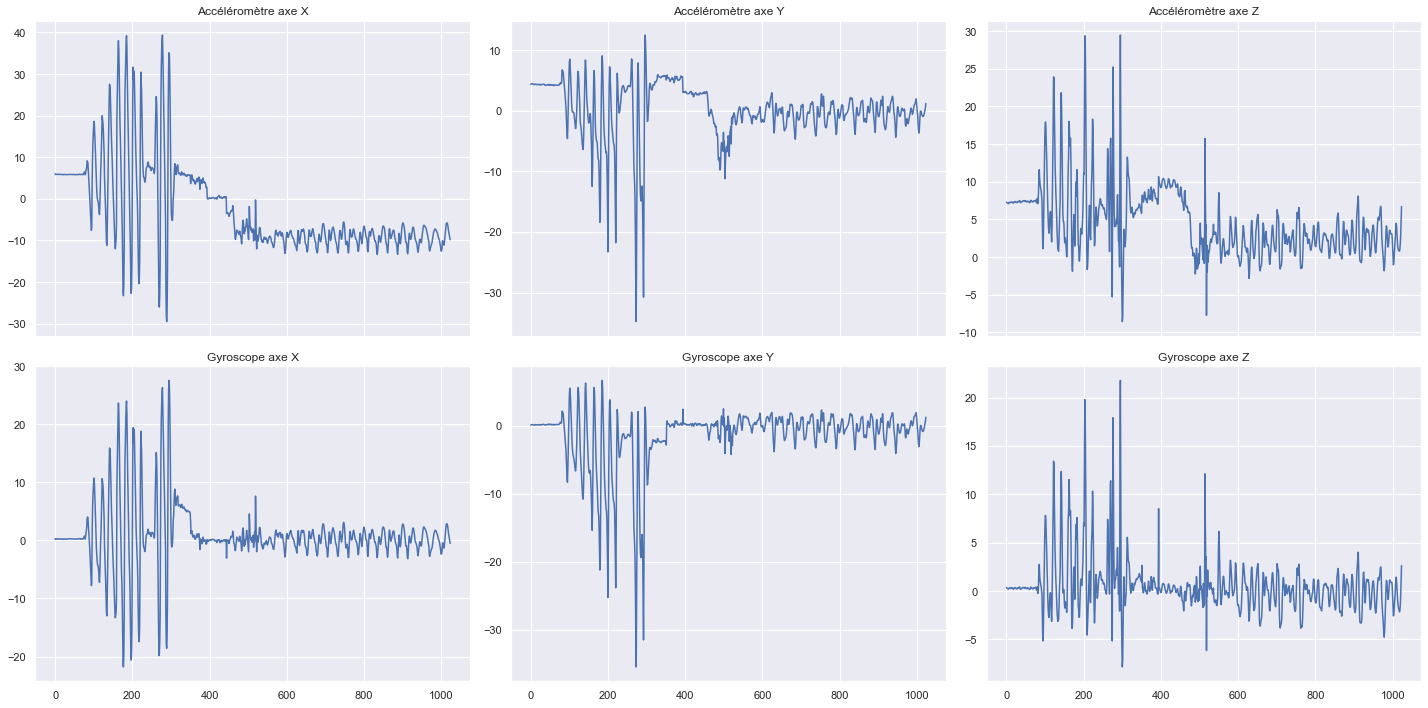

In [10]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set()
fig, ax = plt.subplots(2,3,figsize=(20,10), sharex=True)

g1 = sns.lineplot(data=data['AccX'], ax=ax[0,0])
g2 = sns.lineplot(data=data['AccY'], ax=ax[0,1])
g3 = sns.lineplot(data=data['AccZ'], ax=ax[0,2])
g4 = sns.lineplot(data=data['GyrX'], ax=ax[1,0])
g5 = sns.lineplot(data=data['GyrY'], ax=ax[1,1])
g6 = sns.lineplot(data=data['GyrZ'], ax=ax[1,2])

g1.set_title('Accéléromètre axe X')
g2.set_title('Accéléromètre axe Y') 
g3.set_title('Accéléromètre axe Z') 
g4.set_title('Gyroscope axe X') 
g5.set_title('Gyroscope axe Y') 
g6.set_title('Gyroscope axe Z') 

plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.
#plt.subplots_adjust(wspace=1, hspace=0.5,left=0.1,top=0.9,right=0.9,bottom=0.1) 
plt.show() # affiche la figure a l'ecran

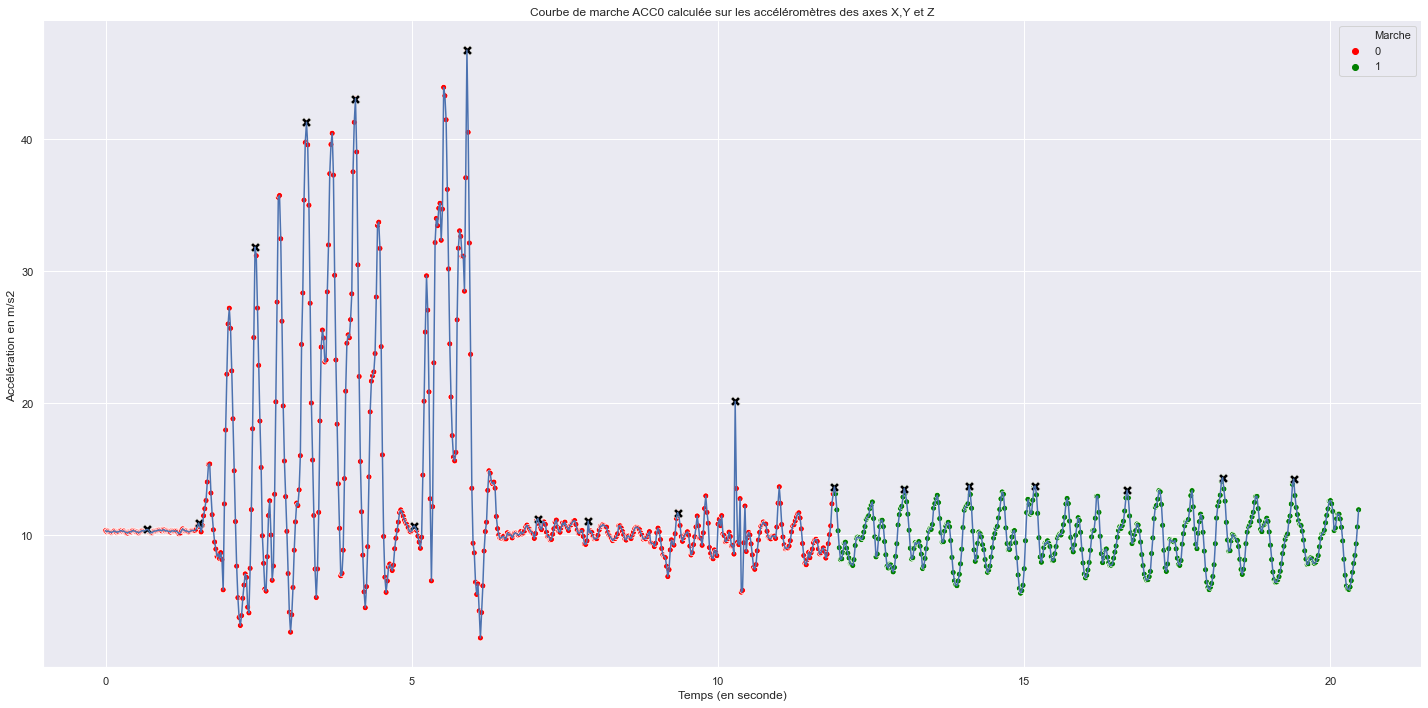

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy.signal import argrelextrema

# Create an array with the colors you want to use
#sns.set(style="white", palette="muted", color_codes=True)
sns.set()
colors = ["red", "green"] # colors = ["#8B0000", "#0000FF"]

# Instruction déplacée plus haut
data['Marche'] = label['Walk'] # blue points = walking data / red points = non-walking datas 

fig, ax = plt.subplots(1,1,figsize=(20,10), sharex=True)

sns.set_palette(sns.color_palette(colors))
g = sns.scatterplot(x=data.index * frequence_sec, y='Acc', hue='Marche', data=data, ax=ax) #initialement x=data.index

g = sns.lineplot(x=data.index * frequence_sec, y='Acc', data=data, ax=ax) #x=data.index * frequence_sec

# Identification des ACCo > 10m/s2 (l'accélération d'un mouvement de chute quand une personne marche
# doit être supérieure à l'accélération de la gravité.
#g.axhline(10, color='black')

# Calcul des maximums locaux
y_locals_max = data['Acc'] # [data['Marche'] == 1]
peaks , locs = find_peaks(y_locals_max, distance=40,height=10)
g = sns.scatterplot(x=peaks * frequence_sec, y=data.loc[list(peaks),'Acc'], s=100, color="0", marker="X", ax=ax)

ax.set_title('Courbe de marche ACC0 calculée sur les accéléromètres des axes X,Y et Z')
ax.set_xlabel("Temps (en seconde)")
ax.set_ylabel("Accélération en m/s2 ")
# Laisser en commentaire sinon écrase les labels : 1 seul affiché...
#ax.legend(['Non marche', 'Marche']) 

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.
plt.savefig("C:\\Users\\tpailhas\\MIASHS\\TER\\Parkinson\\parkinson.jpg",dpi=300, bbox_inches='tight')
plt.show() # affiche la figure a l'ecran

# TRANSFORMEE DE FOURIER

In [ ]:
# Cf https://courspython.com/fft-introduction.html#fonction-fftfreq
from scipy import fftpack

f_s = 40  # Sampling rate, or number of measurements per second

signal = (data['Acc'][data['Marche'] == 1].to_numpy())
signal = signal - np.linalg.norm(signal)

t = list(range(signal.shape[0]))

#print(signal.shape)
#print(signal)

# affichage du signal
plt.subplot(211)
plt.plot(t,signal)

X = fftpack.fft(signal)
freqs = fftpack.fftfreq(len(signal)) * f_s

fig, ax = plt.subplots()
ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

plt.legend()
plt.show()


In [ ]:
np.linalg.norm(signal, axis=1)

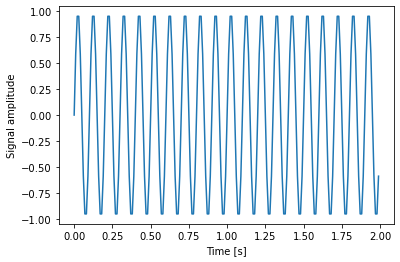

In [4]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');



<ipython-input-5-22dde00554d2>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(freqs, np.abs(X))


(-5.0, 110.0)

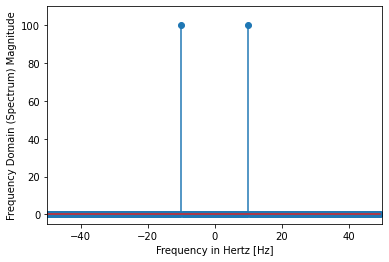

In [5]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)